**Clustering of Covid Patients by Region on DKI Jakarta**

In [39]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.stats as stats

In [40]:
df = pd.read_csv("covid_kelurahan.csv")
df.head(10)

,ID_KEL,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,SUSPEK,Perawatan RS,Isolasi di Rumah,Suspek Meninggal,Selesai Isolasi,...,DISCARDED,Isolasi di Rumah.4,Meninggal Discarded,Selesai Isolasi.4,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan
0,3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2031,15,1938,27,51,NaN
1,3173041007,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1950,17,1829,34,70,NaN
2,3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2194,2,2113,34,45,NaN
3,3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,894,6,853,18,17,NaN
4,3175101006,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3095,6,2998,31,60,NaN
5,3174031002,DKI JAKARTA,JAKARTA SELATAN,MAMPANG PRAPATAN,BANGKA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2013,9,1936,28,40,NaN
6,3175051002,DKI JAKARTA,JAKARTA TIMUR,PASAR REBO,BARU,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2739,14,2654,41,30,NaN
7,3175041004,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BATU AMPAR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3994,20,3778,77,119,NaN
8,3171071002,DKI JAKARTA,JAKARTA PUSAT,TANAH ABANG,BENDUNGAN HILIR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2233,27,2074,40,92,NaN
9,3175031002,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BIDARA CINA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3152,12,2996,63,81,NaN


In [41]:
df.isna().sum()

ID_KEL                   0
Nama_provinsi            0
nama_kota                0
nama_kecamatan           0
nama_kelurahan           0
SUSPEK                 269
Perawatan RS           269
Isolasi di Rumah       269
Suspek Meninggal       269
Selesai Isolasi        269
PROBABLE               269
Perawatan RS.1         269
Isolasi di Rumah.1     269
Probable Meninggal     269
Selesai Isolasi.1      269
PELAKU PERJALANAN      269
Perawatan RS.2         269
Isolasi di Rumah.2     269
Selesai Isolasi.2      269
KONTAK ERAT            269
Perawatan RS.3         269
Isolasi di Rumah.3     269
Selesai Isolasi.3      269
DISCARDED              269
Isolasi di Rumah.4     269
Meninggal Discarded    269
Selesai Isolasi.4      269
Positif                  0
Dirawat                  0
Sembuh                   0
Meninggal                0
Self Isolation           0
Keterangan             269
dtype: int64

In [42]:
df = df[['nama_kelurahan', 'Positif', 'Sembuh', 'Meninggal']]
df

,nama_kelurahan,Positif,Sembuh,Meninggal
0,ANCOL,2031,1938,27
1,ANGKE,1950,1829,34
2,BALE KAMBANG,2194,2113,34
3,BALI MESTER,894,853,18
4,BAMBU APUS,3095,2998,31
...,...,...,...,...
264,UTAN KAYU SELATAN,3784,3612,72
265,UTAN KAYU UTARA,2420,2271,60
266,UTAN PANJANG,2027,1954,36
267,WARAKAS,3059,2962,44


In [43]:
dfc = df[['Positif', 'Sembuh', 'Meninggal']]

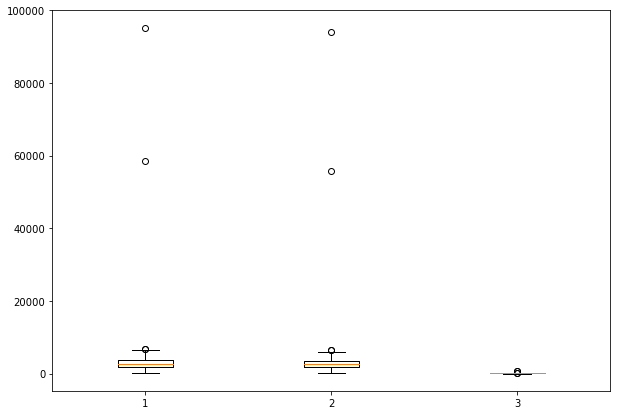

In [44]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(dfc)
 
# show plot
plt.show()

In [45]:
z_score = dfc.apply(stats.zscore)
z_score

,Positif,Sembuh,Meninggal
0,-0.200282,-0.195508,-0.409676
1,-0.212346,-0.212116,-0.288517
2,-0.176006,-0.168843,-0.288517
3,-0.369620,-0.360831,-0.565452
4,-0.041817,-0.033995,-0.340442
...,...,...,...
264,0.060798,0.059561,0.369204
265,-0.142347,-0.144768,0.161503
266,-0.200878,-0.193070,-0.253900
267,-0.047179,-0.039480,-0.115432


**Outlier**

In [46]:
z_score[((z_score['Positif'] > 3) | (z_score['Positif'] < -3)) | ((z_score['Sembuh'] > 3) | (z_score['Meninggal'] < -3)) | ((z_score['Sembuh'] > 3) | (z_score['Meninggal'] < -3))]

,Positif,Sembuh,Meninggal
144,13.688518,13.825831,9.888845
203,8.213273,8.014551,10.633108


In [47]:
z_bersih = z_score.drop(z_score.index[[144, 203]])

In [48]:
z_bersih

,Positif,Sembuh,Meninggal
0,-0.200282,-0.195508,-0.409676
1,-0.212346,-0.212116,-0.288517
2,-0.176006,-0.168843,-0.288517
3,-0.369620,-0.360831,-0.565452
4,-0.041817,-0.033995,-0.340442
...,...,...,...
264,0.060798,0.059561,0.369204
265,-0.142347,-0.144768,0.161503
266,-0.200878,-0.193070,-0.253900
267,-0.047179,-0.039480,-0.115432


In [49]:
k_rng = range(1, 12)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(z_bersih)
    sse.append(km.inertia_)

C:\Users\komar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [50]:
sse

[80.76729581364238,
 31.495325156533195,
 18.13871566574518,
 11.370953938504599,
 7.9690378477380515,
 6.754660524878841,
 5.62508337460114,
 4.806523801257051,
 4.193316299169547,
 3.768189515079098,
 3.318223702244921]

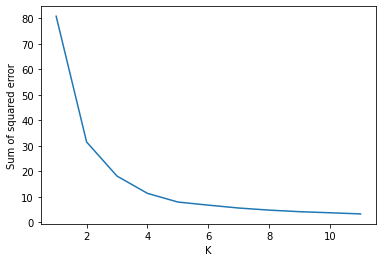

In [51]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [52]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(z_bersih)
y_predicted

array([1, 1, 1, 3, 1, 1, 1, 0, 1, 0, 0, 1, 3, 1, 1, 1, 1, 0, 0, 1, 2, 2,
       0, 1, 0, 0, 3, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1,
       2, 1, 2, 1, 0, 0, 3, 3, 3, 3, 3, 1, 0, 0, 3, 3, 3, 1, 1, 0, 3, 1,
       1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 3, 3, 1, 0, 3, 1, 0, 0, 2, 1,
       3, 3, 3, 3, 0, 2, 1, 1, 3, 1, 3, 3, 1, 1, 0, 3, 0, 0, 1, 1, 0, 2,
       1, 3, 1, 1, 1, 0, 3, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 3, 3, 2, 1,
       1, 1, 1, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3,
       3, 3, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 3, 1, 1, 1, 0, 1, 0, 2,
       0, 2, 1, 1, 0, 1, 2, 0, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 0, 2, 2,
       0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 0, 1, 1, 1, 3, 0, 3, 1, 3,
       0, 1, 3, 1, 3, 1, 0, 1, 3, 3, 0, 3, 3, 1, 0, 0, 1, 1, 1, 1, 1, 2,
       2, 0, 3, 3, 3, 1, 3, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1,
       1, 1, 1])

In [53]:
centroid = km.cluster_centers_
centroid

array([[ 0.10432341,  0.0999749 ,  0.27714298],
       [-0.12500566, -0.12337228, -0.17084986],
       [ 0.33439653,  0.32477072,  0.9559599 ],
       [-0.33652174, -0.33077538, -0.61386145]])

Karena Index 144 dan 203 memiliki karakteristik 3 variabelnya bernilai besar, maka masuk ke cluster 2

In [54]:
df1 = df.drop(df.index[[144, 203]])

In [55]:
df1.shape

(267, 4)

In [56]:
df1['cluster'] = y_predicted

In [57]:
df1

,nama_kelurahan,Positif,Sembuh,Meninggal,cluster
0,ANCOL,2031,1938,27,1
1,ANGKE,1950,1829,34,1
2,BALE KAMBANG,2194,2113,34,1
3,BALI MESTER,894,853,18,3
4,BAMBU APUS,3095,2998,31,1
...,...,...,...,...,...
264,UTAN KAYU SELATAN,3784,3612,72,0
265,UTAN KAYU UTARA,2420,2271,60,1
266,UTAN PANJANG,2027,1954,36,1
267,WARAKAS,3059,2962,44,1


In [58]:
df2 = df.loc[[144, 203]]
df2

,nama_kelurahan,Positif,Sembuh,Meninggal
144,LUAR DKI JAKARTA,95286,93959,622
203,PROSES UPDATE DATA,58523,55820,665


In [59]:
df2['cluster'] = [2, 2]
df2

,nama_kelurahan,Positif,Sembuh,Meninggal,cluster
144,LUAR DKI JAKARTA,95286,93959,622,2
203,PROSES UPDATE DATA,58523,55820,665,2


In [60]:
df = pd.concat([df1, df2])
df

,nama_kelurahan,Positif,Sembuh,Meninggal,cluster
0,ANCOL,2031,1938,27,1
1,ANGKE,1950,1829,34,1
2,BALE KAMBANG,2194,2113,34,1
3,BALI MESTER,894,853,18,3
4,BAMBU APUS,3095,2998,31,1
...,...,...,...,...,...
266,UTAN PANJANG,2027,1954,36,1
267,WARAKAS,3059,2962,44,1
268,WIJAYA KUSUMA,3025,2848,48,1
144,LUAR DKI JAKARTA,95286,93959,622,2


In [61]:
df.to_csv('clustering.csv')

In [62]:
import plotly.graph_objs as go
import plotly.express as px

In [63]:
fig = px.scatter_3d(df1, x='Positif', y='Sembuh', z='Meninggal',
              color='cluster')
fig.show()

In [65]:
fig = px.scatter_3d(df, x='Positif', y='Sembuh', z='Meninggal',
              color='cluster')
fig.show()

In [66]:
df1.groupby('cluster').mean()

,Positif,Sembuh,Meninggal
cluster,,,
0,4076.246377,3877.231884,66.681159
1,2536.438596,2411.421053,40.798246
2,5621.050000,5352.550000,105.900000
3,1116.234375,1050.250000,15.203125


In [72]:
cluster0 = df1[df.cluster == 0]
cluster0

<ipython-input-72-6f5c6094209c>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,nama_kelurahan,Positif,Sembuh,Meninggal,cluster
7,BATU AMPAR,3994,3778,77,0
9,BIDARA CINA,3152,2996,63,0
10,BINTARO,4096,3867,82,0
17,CEMPAKA BARU,3163,2989,66,0
18,CEMPAKA PUTIH BARAT,4288,4085,76,0
...,...,...,...,...,...
245,SUSUKAN,3375,3239,69,0
251,TANJUNG BARAT,3387,3183,56,0
257,TEGAL ALUR,4672,4485,80,0
263,ULUJAMI,3324,3177,55,0


In [73]:
cluster1 = df1[df.cluster == 1]
cluster1

<ipython-input-73-a1d1c3fa9d73>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,nama_kelurahan,Positif,Sembuh,Meninggal,cluster
0,ANCOL,2031,1938,27,1
1,ANGKE,1950,1829,34,1
2,BALE KAMBANG,2194,2113,34,1
4,BAMBU APUS,3095,2998,31,1
5,BANGKA,2013,1936,28,1
...,...,...,...,...,...
262,UJUNG MENTENG,1868,1785,28,1
265,UTAN KAYU UTARA,2420,2271,60,1
266,UTAN PANJANG,2027,1954,36,1
267,WARAKAS,3059,2962,44,1


In [74]:
cluster2 = df1[df.cluster == 2]
cluster2

<ipython-input-74-40c4ba3ee475>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,nama_kelurahan,Positif,Sembuh,Meninggal,cluster
20,CENGKARENG BARAT,5869,5552,107,2
21,CENGKARENG TIMUR,6262,5952,108,2
42,CIPINANG MUARA,5017,4804,113,2
44,CIRACAS,5956,5717,113,2
46,DUREN SAWIT,5657,5389,109,2
70,JAGAKARSA,6794,6565,100,2
86,KALISARI,4547,4366,89,2
93,KAPUK,6800,6425,170,2
109,KEBON JERUK,5354,5079,87,2
130,KLENDER,4738,4507,107,2


In [77]:
cluster3 = df1[df.cluster == 3]
cluster3

<ipython-input-77-8dc1416662bc>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,nama_kelurahan,Positif,Sembuh,Meninggal,cluster
3,BALI MESTER,894,853,18,3
12,BUNGUR,1501,1425,26,3
26,CIKINI,777,708,15,3
27,CIKOKO,1206,1131,13,3
50,DURI PULO,1603,1472,29,3
...,...,...,...,...,...
234,SETU,2039,1966,14,3
246,TAMAN SARI,1533,1413,22,3
247,TAMBORA,889,793,22,3
248,TANAH SEREAL,2199,2020,23,3
